# Single Layer Perceptrons

### What is a Single Layer Perceptron?
- A Single Layer Perceptron (SLP) is the simplest type of artificial neural network, introduced by Frank Rosenblatt in 1958.

It consists of:
- Input layer: Accepts features (x values).
- Weights (w): Each input has an associated weight that determines its importance.
- Summation function: Calculates the weighted sum of inputs.
- Activation function: Applies a threshold to decide the output (0 or 1).
- Output layer: Produces the final prediction.

It is mainly used for binary classification problems (e.g., classifying into 0 or 1).


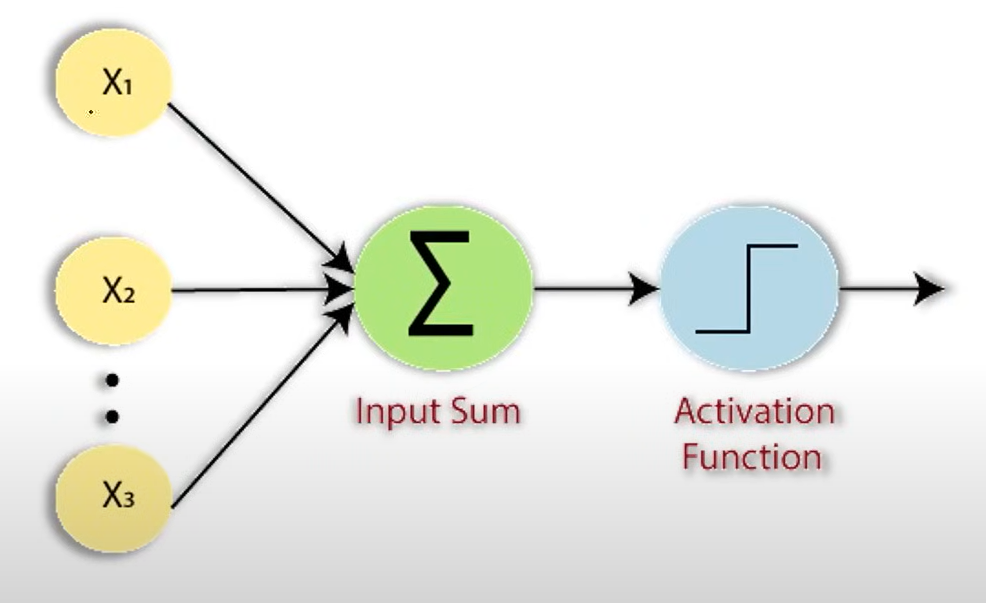

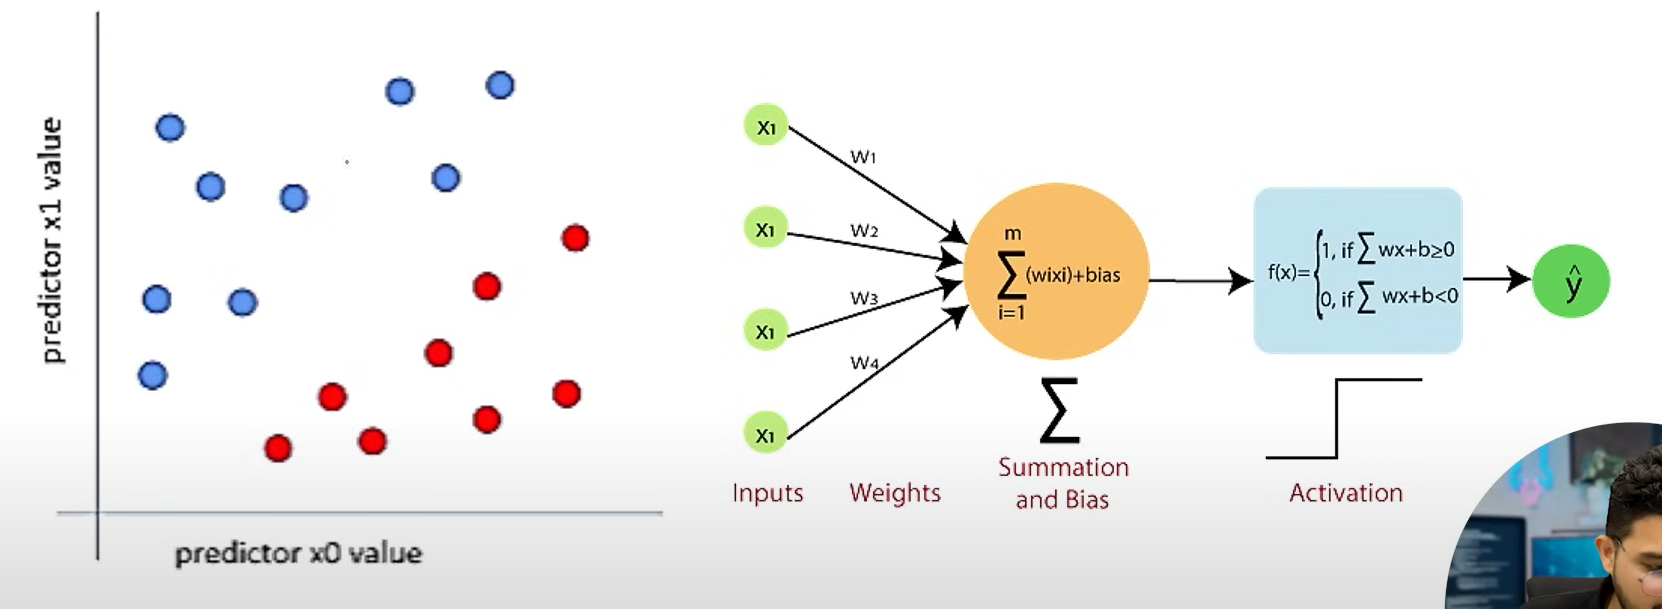

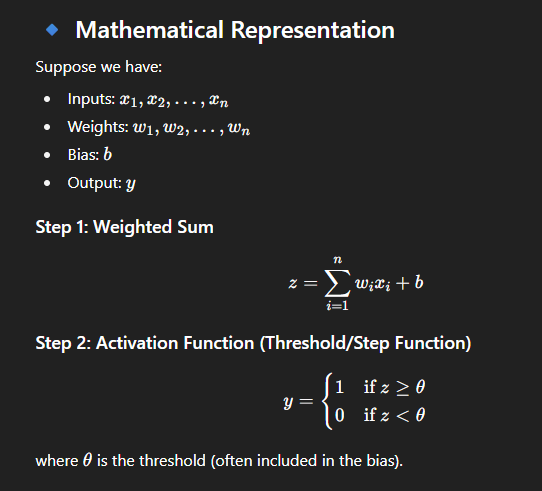
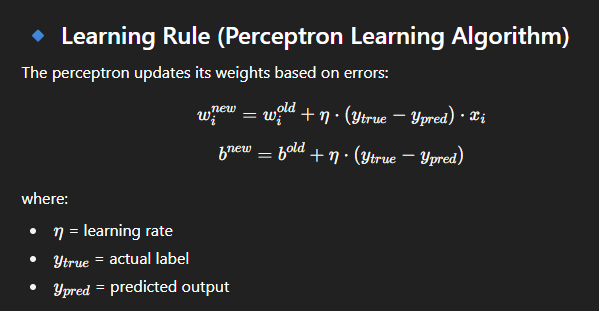

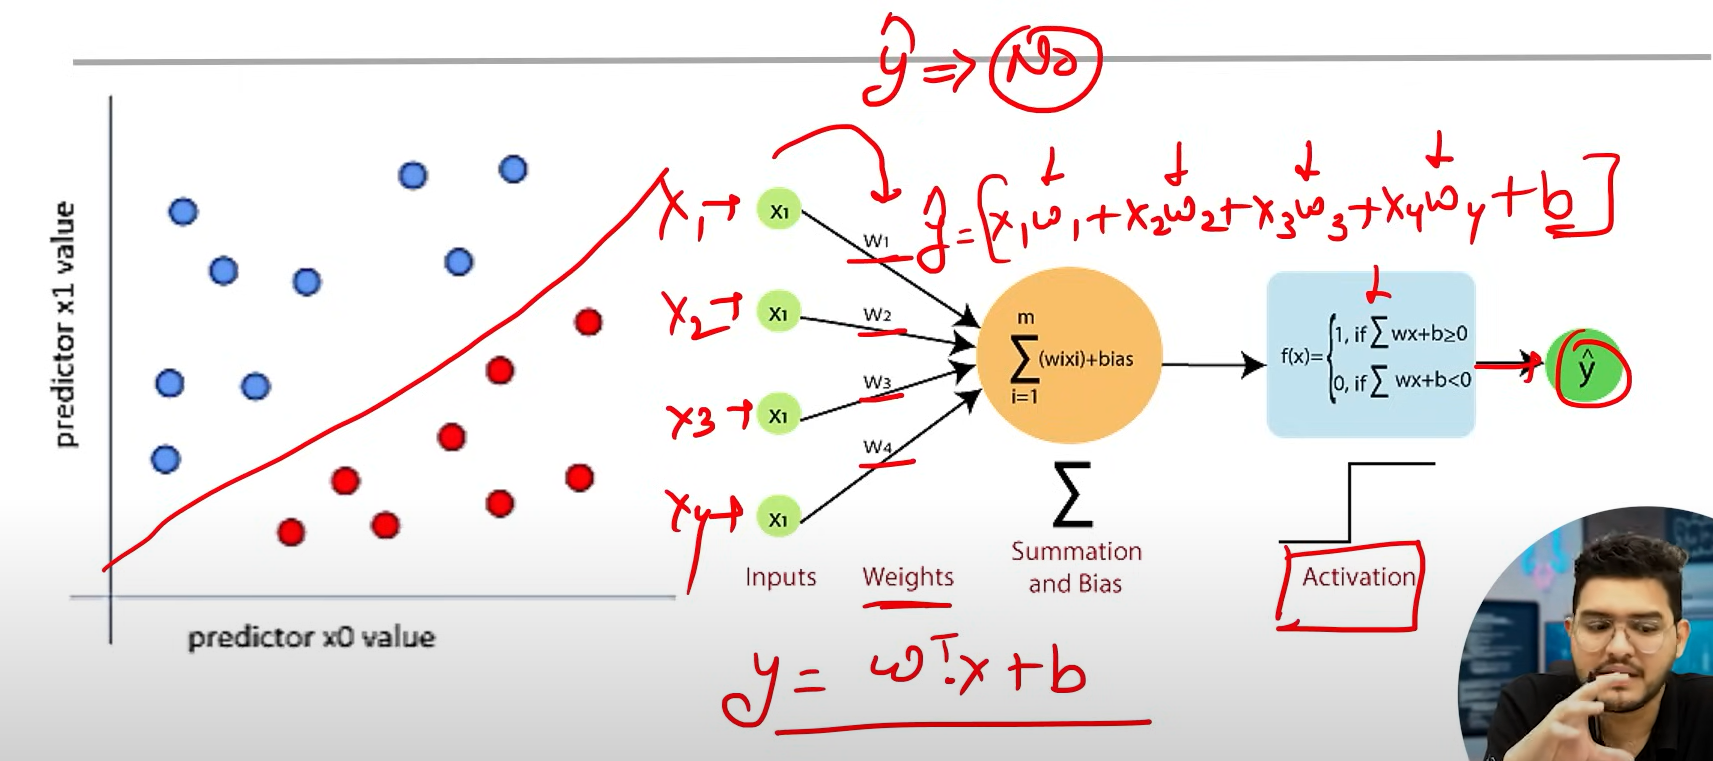

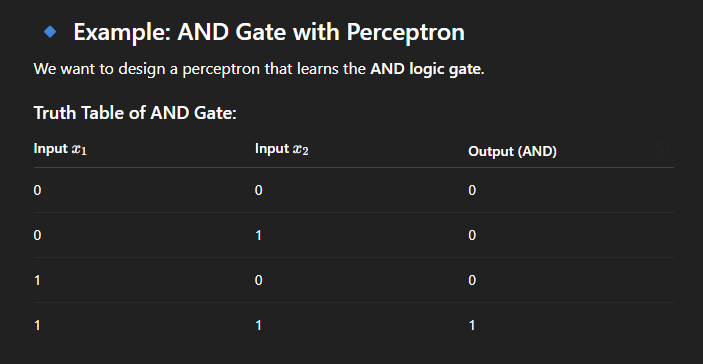
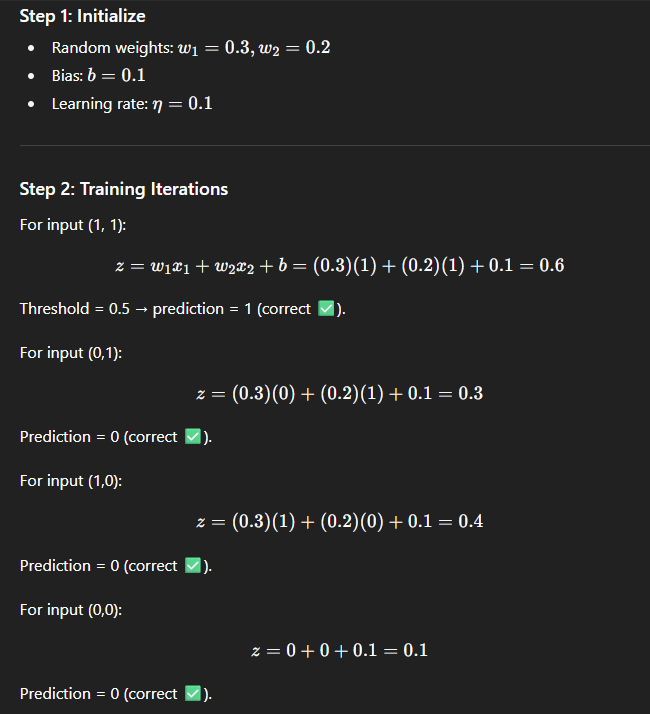
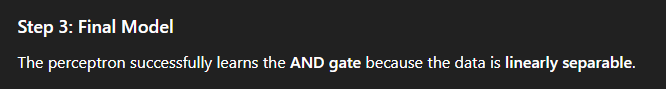

----

# Example 
### From GPT 
##### 1) From Scratch Perceptron

In [1]:
import numpy as np

class Perceptron:
    def __init__(self, lr=0.1, epochs=20):
        self.lr = lr
        self.epochs = epochs
        self.w = None   # weights (including bias as w[0])

    def _add_bias(self, X):
        # Add a column of ones as bias term
        return np.c_[np.ones((X.shape[0], 1)), X]

    def fit(self, X, y):
        """
        X: shape (n_samples, n_features)
        y: binary labels {0,1}
        """
        Xb = self._add_bias(X)                          # shape: (n, d+1)
        self.w = np.zeros(Xb.shape[1])                  # initialize weights

        # Convert y to {-1, +1} for perceptron update rule convenience
        y_signed = np.where(y == 1, 1, -1)

        for _ in range(self.epochs):
            for xi, target in zip(Xb, y_signed):
                # Step activation on raw score
                raw = np.dot(xi, self.w)
                pred = 1 if raw >= 0 else -1
                if pred != target:
                    # Perceptron update: w <- w + lr * (target - pred) * x
                    self.w += self.lr * (target - pred) * xi

        return self

    def predict(self, X):
        Xb = self._add_bias(X)
        raw = Xb @ self.w
        # Map raw >= 0 -> 1, else 0
        return (raw >= 0).astype(int)

    def decision_function(self, X):
        Xb = self._add_bias(X)
        return Xb @ self.w

##### Datasets: AND, OR, XOR

In [2]:
# Inputs: all 2-bit combinations
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

y_and = np.array([0,0,0,1])
y_or  = np.array([0,1,1,1])
y_xor = np.array([0,1,1,0])

# Train & test on AND
p_and = Perceptron(lr=0.1, epochs=20).fit(X, y_and)
print("AND predictions:", p_and.predict(X))   # expected: [0 0 0 1]

# Train & test on OR
p_or = Perceptron(lr=0.1, epochs=20).fit(X, y_or)
print("OR predictions:", p_or.predict(X))     # expected: [0 1 1 1]

# Train & test on XOR (will fail)
p_xor = Perceptron(lr=0.1, epochs=50).fit(X, y_xor)
print("XOR predictions:", p_xor.predict(X))   # typically wrong, e.g. [0 1 1 1] or similar


AND predictions: [0 0 0 1]
OR predictions: [0 1 1 1]
XOR predictions: [1 1 0 0]


##### 2) With scikit-learn (Perceptron)

In [3]:
from sklearn.linear_model import Perceptron
import numpy as np

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y_and = np.array([0,0,0,1])
y_or  = np.array([0,1,1,1])
y_xor = np.array([0,1,1,0])

clf_and = Perceptron(max_iter=1000, eta0=0.1, tol=1e-3, random_state=0)
clf_and.fit(X, y_and)
print("sklearn AND:", clf_and.predict(X))   # [0 0 0 1]

clf_or = Perceptron(max_iter=1000, eta0=0.1, tol=1e-3, random_state=0)
clf_or.fit(X, y_or)
print("sklearn OR:", clf_or.predict(X))     # [0 1 1 1]

clf_xor = Perceptron(max_iter=5000, eta0=0.1, tol=1e-4, random_state=0)
clf_xor.fit(X, y_xor)
print("sklearn XOR:", clf_xor.predict(X))   # will still fail


sklearn AND: [0 0 0 1]
sklearn OR: [0 1 1 1]
sklearn XOR: [0 0 0 0]


---

# From Youtube

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from mlxtend.plotting import plot_decision_regions

In [5]:
ds = pd.read_csv('placement-dataset.csv')
ds.head()

,cgpa,iq,placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0


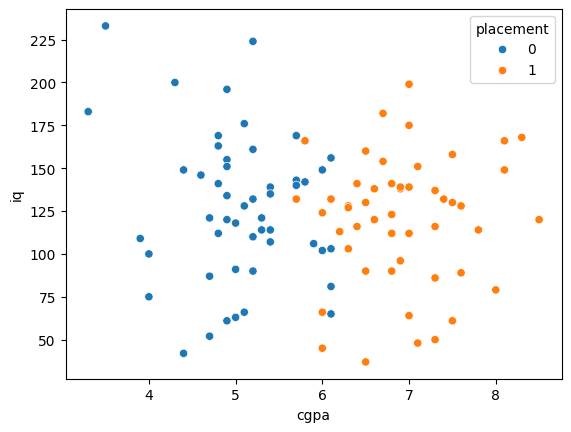

In [6]:
sns.scatterplot(x='cgpa', y='iq', data= ds, hue='placement')
plt.show()

In [7]:
x = ds.drop(columns= 'placement')
y = ds['placement']

In [8]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 8)

In [63]:
from sklearn.linear_model import Perceptron

In [64]:
pr = Perceptron()
pr.fit(X_train, Y_train)

Perceptron()

In [65]:
pr.score(x_test, y_test)*100, pr.score(X_train, Y_train)*100

(75.0, 71.25)

C:\Users\Dev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


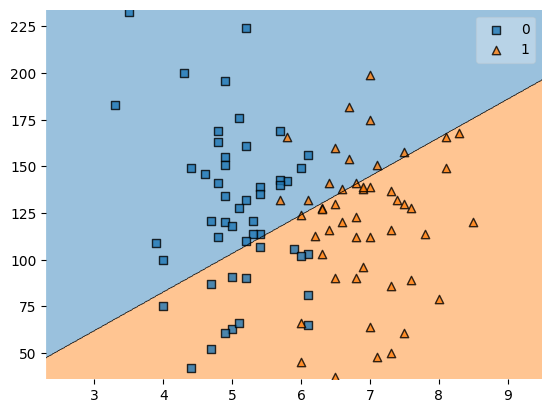

In [67]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf= pr)
plt.show()